# **Task 2: Training from scratch: images**

In [1]:
# necessary imports
import os
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [2]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Input Target Size

In [3]:
# loop through images, load and store size
images_sizes = []
for image_filename in images_X['filename']:
    if image_filename != 'filename':
        image = Image.open(image_filename)
        images_sizes.append(image.size)

# convert to np array
images_sizes = numpy.array(images_sizes)

# print statistics
print("Loaded images: " + str(len(images_sizes)))
print("Average size: " + str(numpy.average(images_sizes, axis=0)))

Loaded images: 55086
Average size: [512. 512.]


In [4]:
# target size
TARGET_SIZE = (128, 128)

## Experiment 0 - Simple Model

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

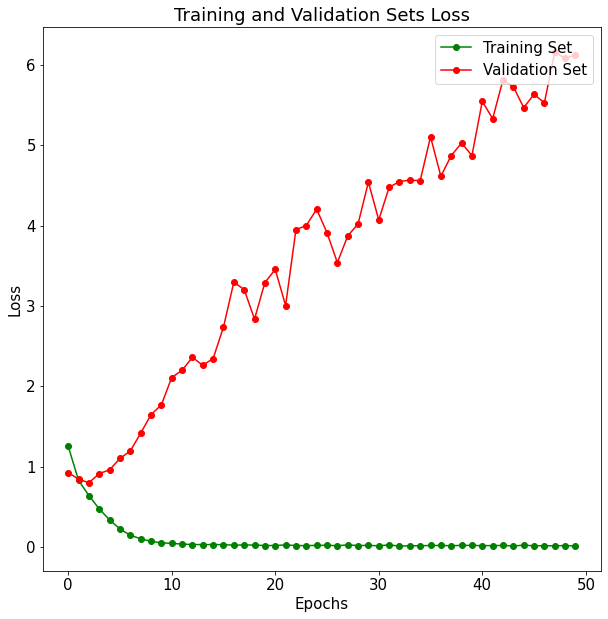

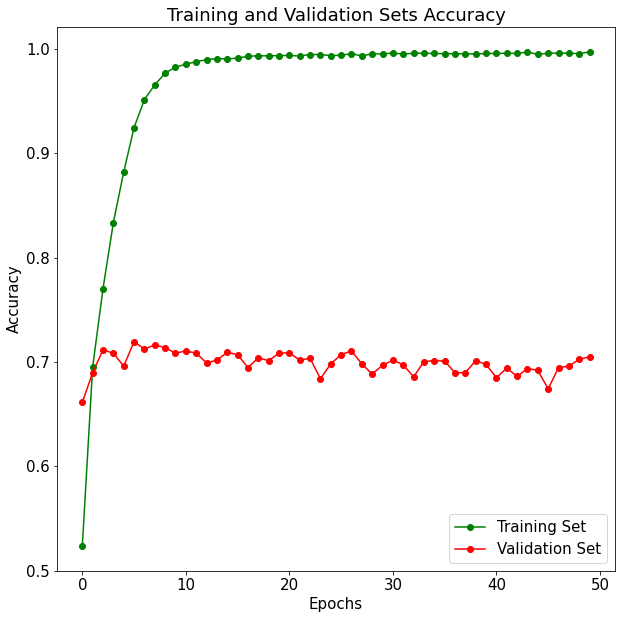

47/47 [==============================] - 4s 95ms/step - loss: 0.7995 - accuracy: 0.7107
Best model Test Loss: 0.7995204329490662
Best model Test Accuracy: 0.7106666564941406
Confusion Matrix
Normalized confusion matrix


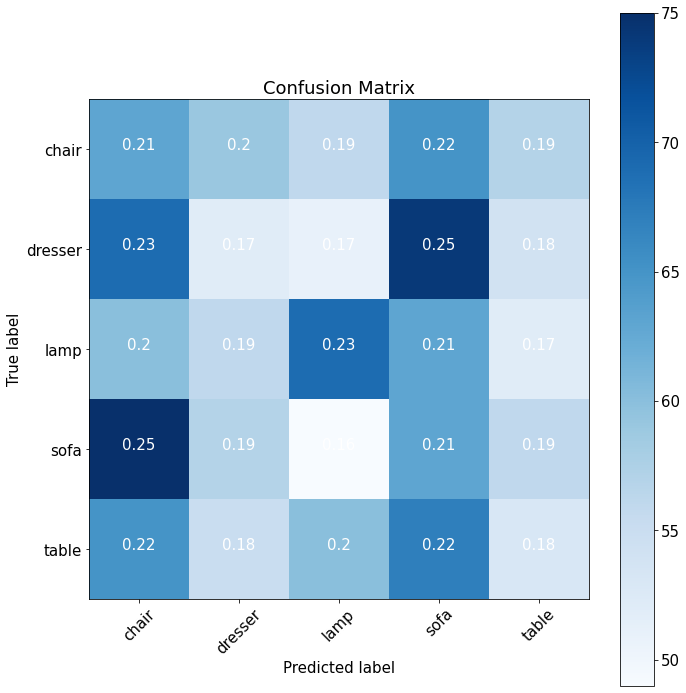

Classification Report
              precision    recall  f1-score   support

       chair       0.19      0.21      0.20       300
     dresser       0.19      0.17      0.18       300
        lamp       0.24      0.23      0.24       300
        sofa       0.19      0.21      0.20       300
       table       0.19      0.18      0.19       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [10]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-0", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=50,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 1 - Dropout

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-1-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

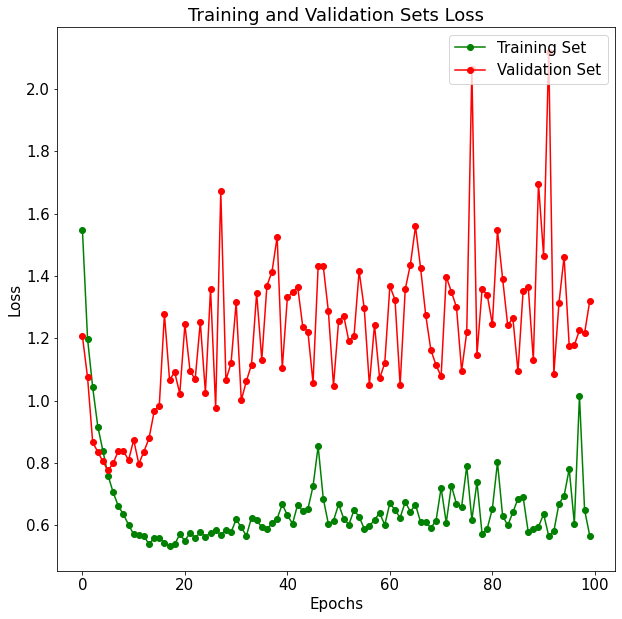

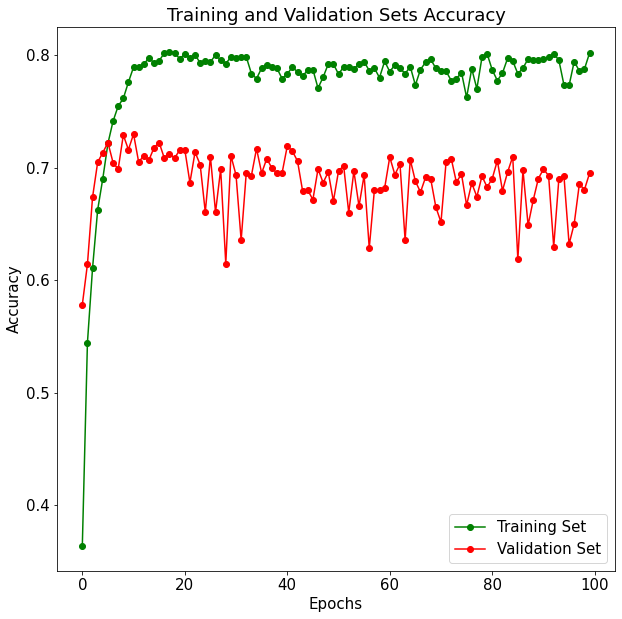

47/47 [==============================] - 5s 96ms/step - loss: 0.8185 - accuracy: 0.7080
Best model Test Loss: 0.8184950351715088
Best model Test Accuracy: 0.7080000042915344
Confusion Matrix
Normalized confusion matrix


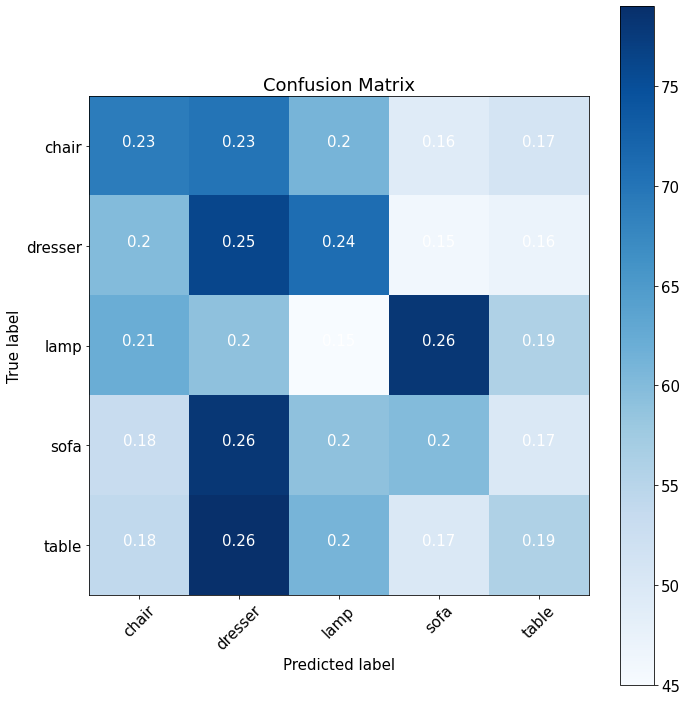

Classification Report
              precision    recall  f1-score   support

       chair       0.23      0.23      0.23       300
     dresser       0.21      0.25      0.23       300
        lamp       0.15      0.15      0.15       300
        sofa       0.21      0.20      0.21       300
       table       0.22      0.19      0.20       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-1", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 2 - Larger Model

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-08 21:25:19.318770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.337598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.337760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 21:25:19.338212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-2-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

2022-02-08 21:25:20.995745: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/352 [..............................] - ETA: 10:46 - loss: 1.6131 - accuracy: 0.2188

2022-02-08 21:25:21.701692: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


352/352 [==============================] - ETA: 0s - loss: 1.1996 - accuracy: 0.5466
Epoch 00001: val_loss improved from inf to 0.91842, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 43s 116ms/step - loss: 1.1996 - accuracy: 0.5466 - val_loss: 0.9184 - val_accuracy: 0.6458
Epoch 2/100
352/352 [==============================] - ETA: 0s - loss: 0.9057 - accuracy: 0.6659
Epoch 00002: val_loss improved from 0.91842 to 0.82756, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 40s 113ms/step - loss: 0.9057 - accuracy: 0.6659 - val_loss: 0.8276 - val_accuracy: 0.6907
Epoch 3/100
352/352 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7131
Epoch 00003: val_loss improved from 0.82756 to 0.79282, saving model to saved_models/images/Experiment-2/Experiment-2-fold-1.h5
352/352 [==============================] - 39s 112ms/step - loss: 0.7903 

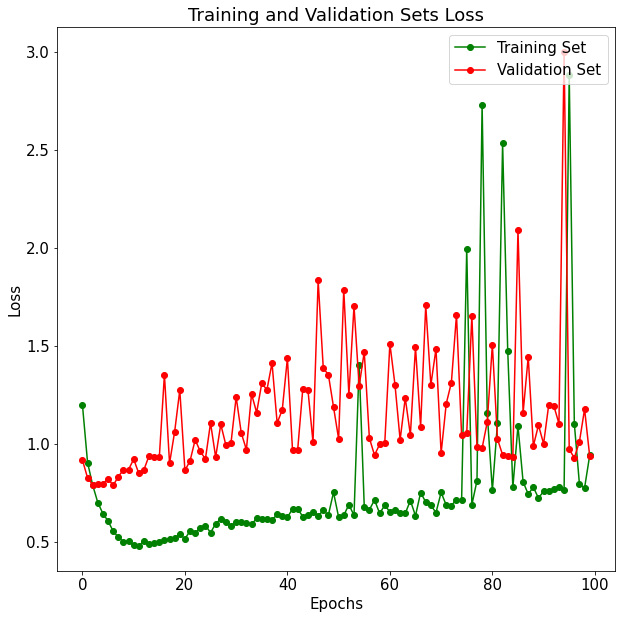

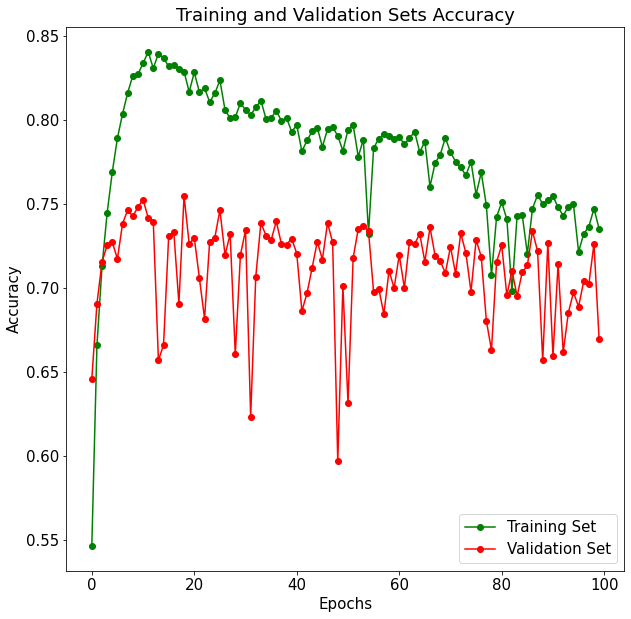

47/47 [==============================] - 5s 100ms/step - loss: 0.7140 - accuracy: 0.7593
Best model Test Loss: 0.7139813899993896
Best model Test Accuracy: 0.7593333125114441
Confusion Matrix
Normalized confusion matrix


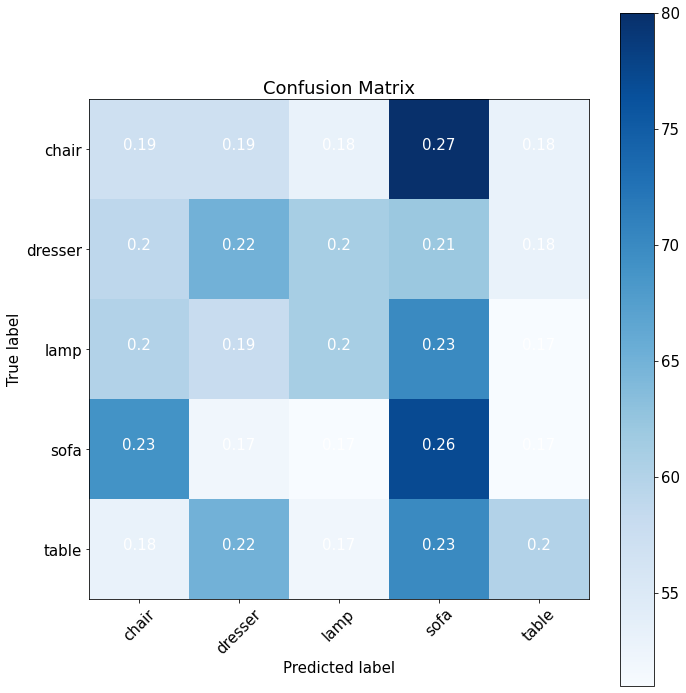

Classification Report
              precision    recall  f1-score   support

       chair       0.19      0.19      0.19       300
     dresser       0.22      0.22      0.22       300
        lamp       0.22      0.20      0.21       300
        sofa       0.21      0.26      0.23       300
       table       0.22      0.20      0.21       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-2", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=32, one_fold=True, resample_data=3000, augment=False)

## Experiment 3 - Data Augmentation

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-3-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                              

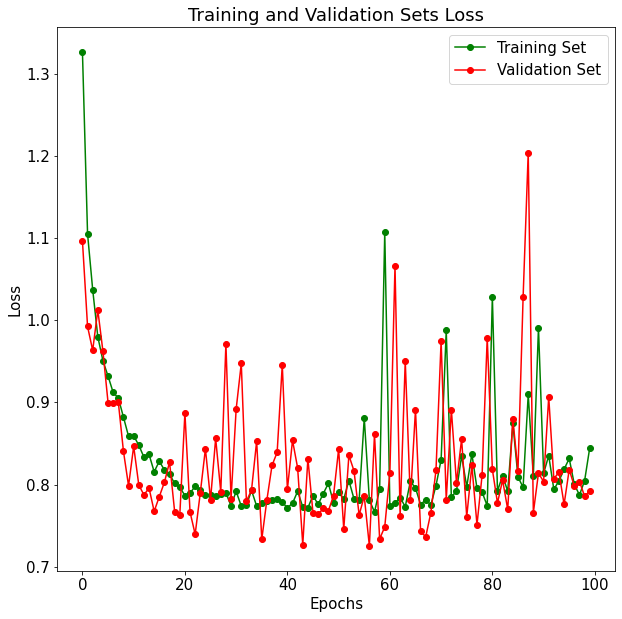

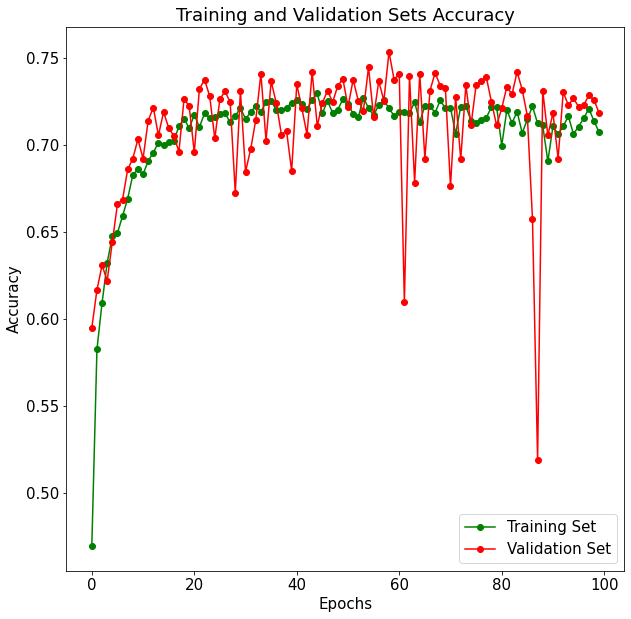

24/24 [==============================] - 7s 275ms/step - loss: 0.7259 - accuracy: 0.7500
Best model Test Loss: 0.7259452939033508
Best model Test Accuracy: 0.75
Confusion Matrix
Normalized confusion matrix


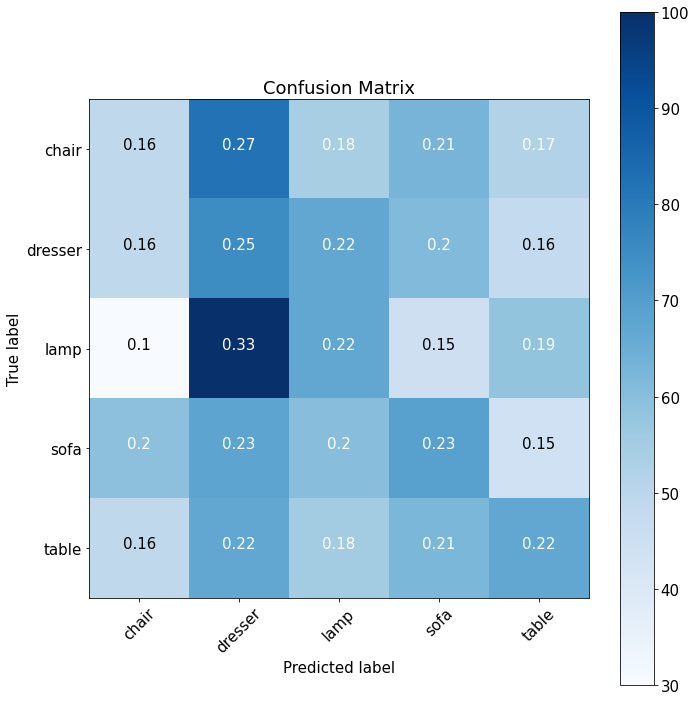

Classification Report
              precision    recall  f1-score   support

       chair       0.21      0.16      0.18       300
     dresser       0.19      0.25      0.22       300
        lamp       0.22      0.22      0.22       300
        sofa       0.23      0.23      0.23       300
       table       0.25      0.22      0.24       300

    accuracy                           0.22      1500
   macro avg       0.22      0.22      0.22      1500
weighted avg       0.22      0.22      0.22      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-3", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=100,
                        batch_size=64, one_fold=True, resample_data=3000, augment=True)

## Experiment 4 - Deeper CNN, Longer Training

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-09 21:08:03.013047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 21:08:03.030714: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-4-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

2022-02-09 21:08:04.953033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-09 21:08:05.698347: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


176/176 [==============================] - ETA: 0s - loss: 1.3693 - accuracy: 0.4395
Epoch 00001: val_loss improved from inf to 1.14695, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 62s 340ms/step - loss: 1.3693 - accuracy: 0.4395 - val_loss: 1.1469 - val_accuracy: 0.5564
Epoch 2/200
176/176 [==============================] - ETA: 0s - loss: 1.1407 - accuracy: 0.5656
Epoch 00002: val_loss improved from 1.14695 to 1.00872, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 59s 337ms/step - loss: 1.1407 - accuracy: 0.5656 - val_loss: 1.0087 - val_accuracy: 0.6124
Epoch 3/200
176/176 [==============================] - ETA: 0s - loss: 1.0549 - accuracy: 0.6045
Epoch 00003: val_loss improved from 1.00872 to 0.86853, saving model to saved_models/images/Experiment-4/Experiment-4-fold-1.h5
176/176 [==============================] - 59s 333ms/step - loss: 1.0549 

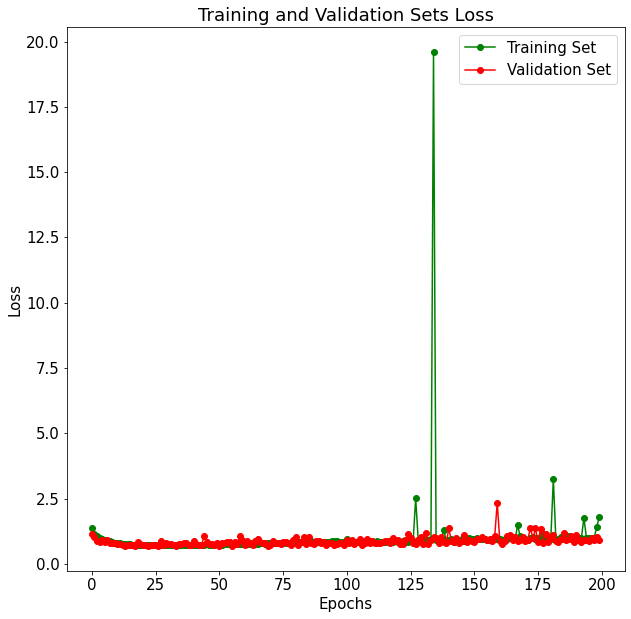

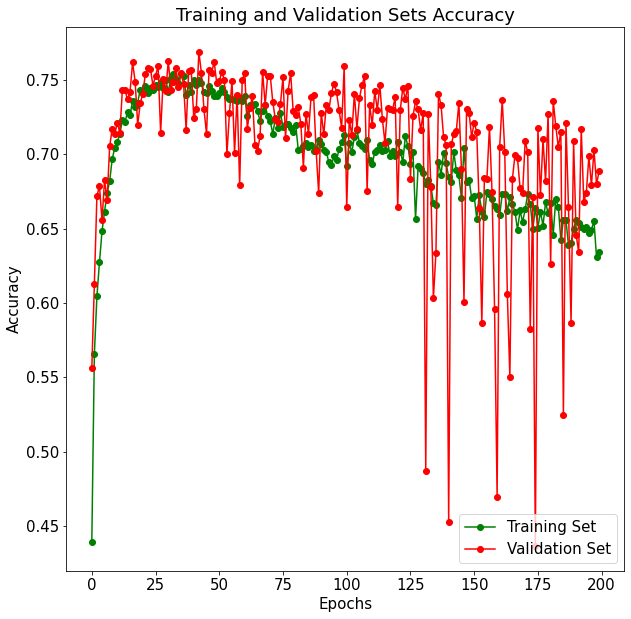

24/24 [==============================] - 7s 285ms/step - loss: 0.7403 - accuracy: 0.7380
Best model Test Loss: 0.7402656078338623
Best model Test Accuracy: 0.7379999756813049
Confusion Matrix
Normalized confusion matrix


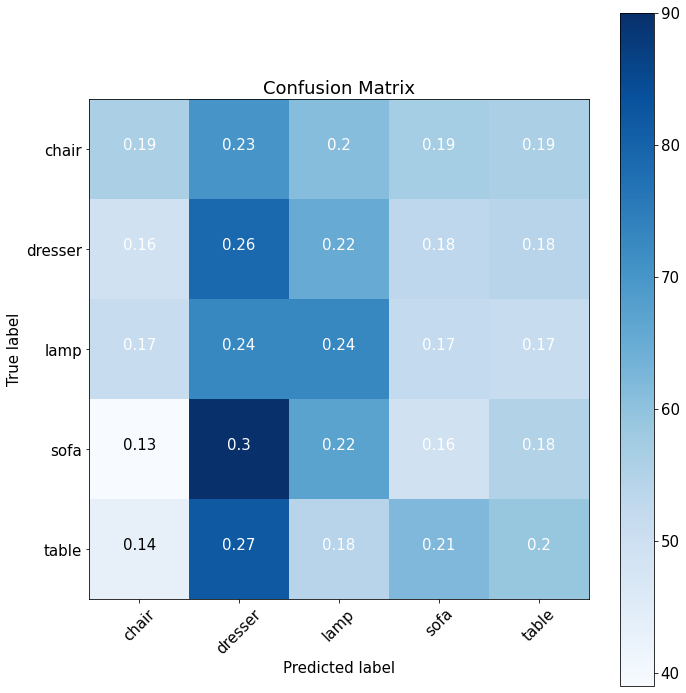

Classification Report
              precision    recall  f1-score   support

       chair       0.24      0.19      0.21       300
     dresser       0.20      0.26      0.23       300
        lamp       0.23      0.24      0.24       300
        sofa       0.18      0.16      0.17       300
       table       0.21      0.20      0.21       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-4", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=200,
                        batch_size=64, one_fold=True, resample_data=3000, augment=True)

## Experiment 5 - Larger Dense Layer, Larger Batch Size

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-10 00:31:12.756270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 00:31:12.792901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 00:31:12.793016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 00:31:12.793728: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-5-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)   

2022-02-10 00:31:15.747358: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-10 00:31:16.688346: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


88/88 [==============================] - ETA: 0s - loss: 1.4981 - accuracy: 0.3850
Epoch 00001: val_loss improved from inf to 1.19505, saving model to saved_models/images/Experiment-5/Experiment-5-fold-1.h5
88/88 [==============================] - 63s 693ms/step - loss: 1.4981 - accuracy: 0.3850 - val_loss: 1.1950 - val_accuracy: 0.5596
Epoch 2/300
88/88 [==============================] - ETA: 0s - loss: 1.2018 - accuracy: 0.5401
Epoch 00002: val_loss improved from 1.19505 to 1.15088, saving model to saved_models/images/Experiment-5/Experiment-5-fold-1.h5
88/88 [==============================] - 58s 665ms/step - loss: 1.2018 - accuracy: 0.5401 - val_loss: 1.1509 - val_accuracy: 0.5396
Epoch 3/300
88/88 [==============================] - ETA: 0s - loss: 1.0758 - accuracy: 0.5952
Epoch 00003: val_loss improved from 1.15088 to 0.97490, saving model to saved_models/images/Experiment-5/Experiment-5-fold-1.h5
88/88 [==============================] - 60s 678ms/step - loss: 1.0758 - accuracy: 

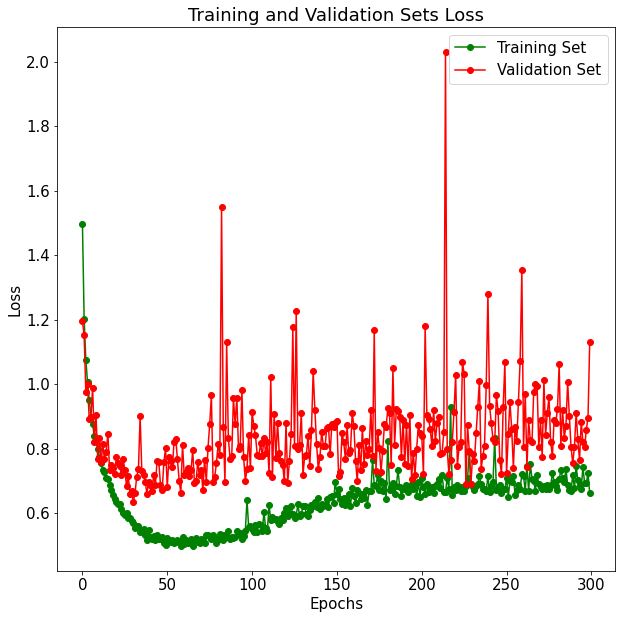

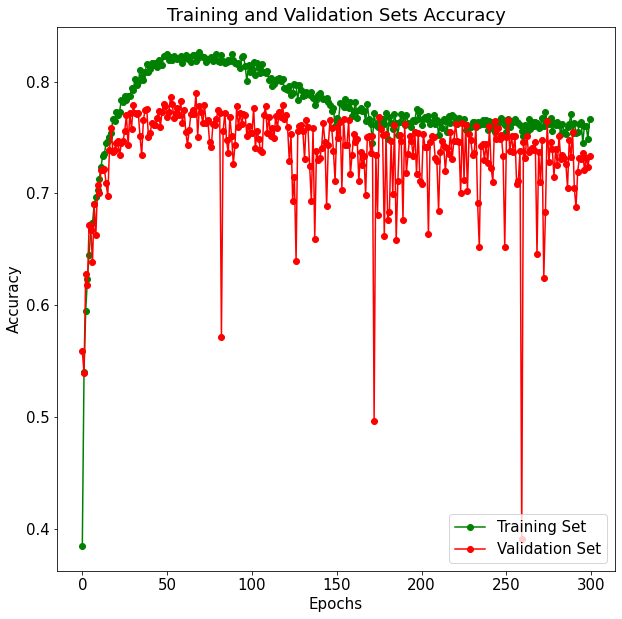

12/12 [==============================] - 7s 547ms/step - loss: 0.6769 - accuracy: 0.7727
Best model Test Loss: 0.676884114742279
Best model Test Accuracy: 0.7726666927337646
Confusion Matrix
Normalized confusion matrix


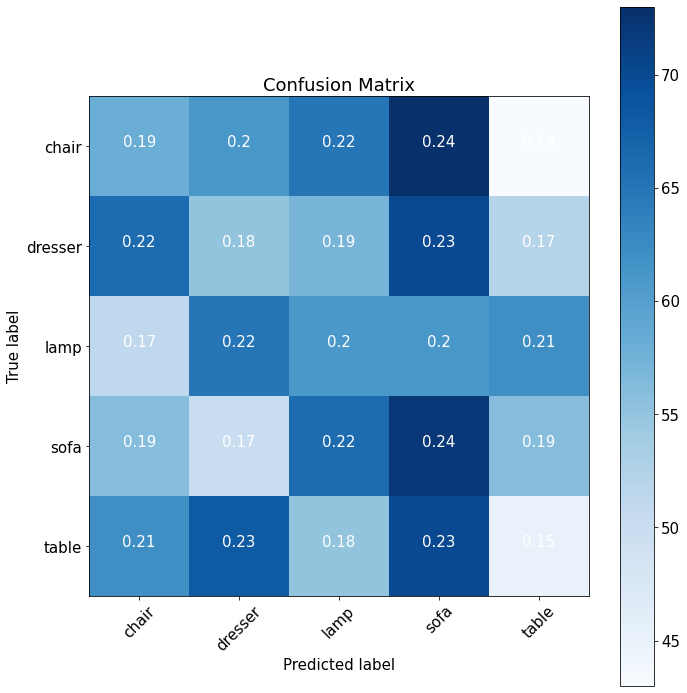

Classification Report
              precision    recall  f1-score   support

       chair       0.20      0.19      0.20       300
     dresser       0.18      0.18      0.18       300
        lamp       0.20      0.20      0.20       300
        sofa       0.21      0.24      0.22       300
       table       0.17      0.15      0.16       300

    accuracy                           0.19      1500
   macro avg       0.19      0.19      0.19      1500
weighted avg       0.19      0.19      0.19      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-5", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=TARGET_SIZE, epochs=300,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 6 (A) - Learning Rate Decay

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-6-1-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                            

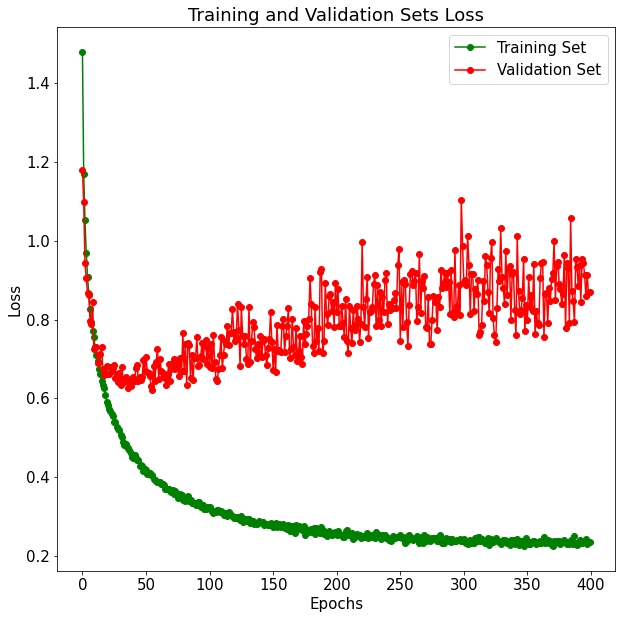

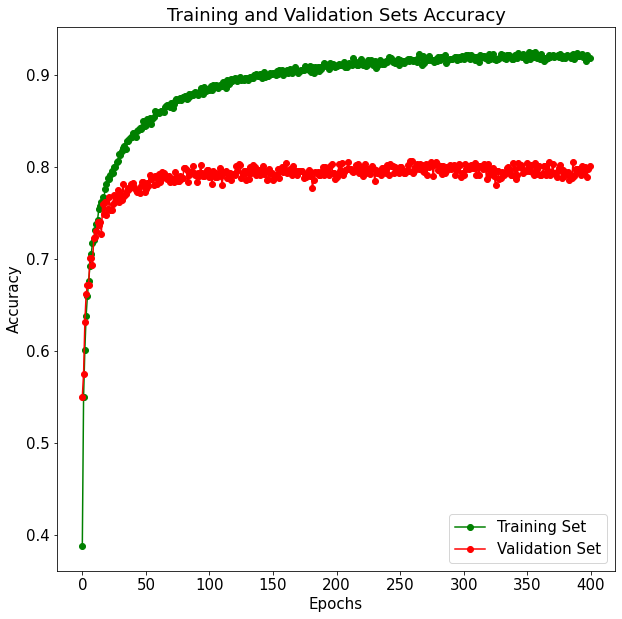

12/12 [==============================] - 7s 554ms/step - loss: 0.6156 - accuracy: 0.8113
Best model Test Loss: 0.6155534982681274
Best model Test Accuracy: 0.8113333582878113
Confusion Matrix
Normalized confusion matrix


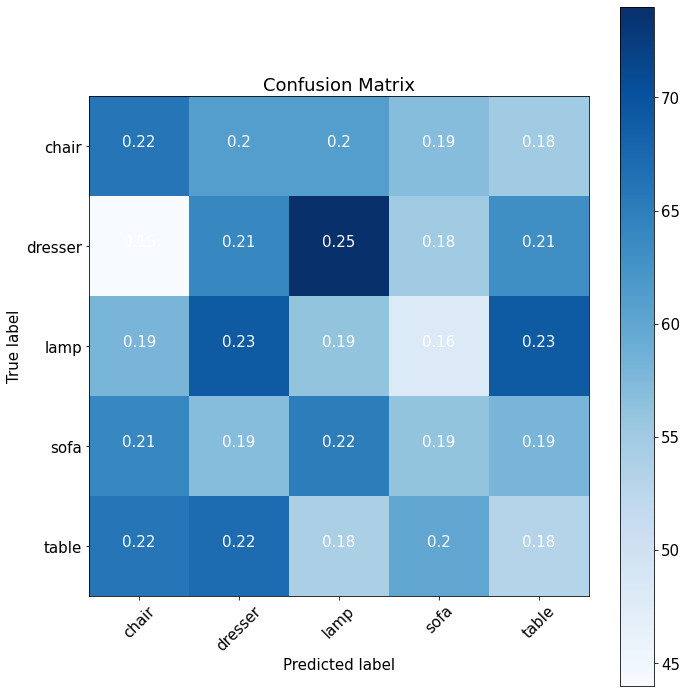

Classification Report
              precision    recall  f1-score   support

       chair       0.22      0.22      0.22       300
     dresser       0.20      0.21      0.21       300
        lamp       0.18      0.19      0.18       300
        sofa       0.20      0.19      0.19       300
       table       0.18      0.18      0.18       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-6-1", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 6 (B) - Decreased Learning Rate Decay, Early Stopping

#### Early stopping is set at `min_delta=0.01, patience=100`, i.e. an improvement of 1% for 100 epochs of training.

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-10 12:24:28.535509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 12:24:28.571247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 12:24:28.571370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 12:24:28.572146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-6-2-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128) 

2022-02-10 12:24:31.448876: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-10 12:24:32.383701: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


88/88 [==============================] - ETA: 0s - loss: 1.5558 - accuracy: 0.3901
Epoch 00001: val_loss improved from inf to 1.23400, saving model to saved_models/images/Experiment-6-2/Experiment-6-2-fold-1.h5
88/88 [==============================] - 62s 685ms/step - loss: 1.5558 - accuracy: 0.3901 - val_loss: 1.2340 - val_accuracy: 0.5324
Epoch 2/400
88/88 [==============================] - ETA: 0s - loss: 1.1823 - accuracy: 0.5485
Epoch 00002: val_loss improved from 1.23400 to 1.01180, saving model to saved_models/images/Experiment-6-2/Experiment-6-2-fold-1.h5
88/88 [==============================] - 58s 663ms/step - loss: 1.1823 - accuracy: 0.5485 - val_loss: 1.0118 - val_accuracy: 0.6178
Epoch 3/400
88/88 [==============================] - ETA: 0s - loss: 1.0447 - accuracy: 0.6102
Epoch 00003: val_loss did not improve from 1.01180
88/88 [==============================] - 59s 667ms/step - loss: 1.0447 - accuracy: 0.6102 - val_loss: 1.0245 - val_accuracy: 0.6160
Epoch 4/400
88/88 [=

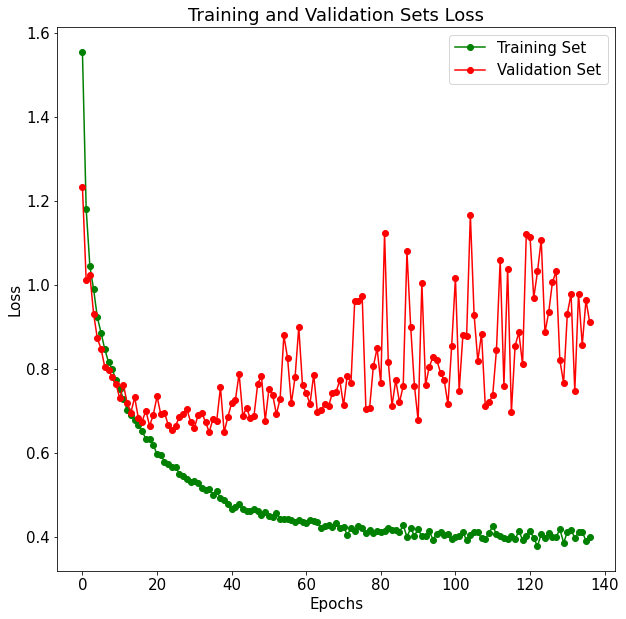

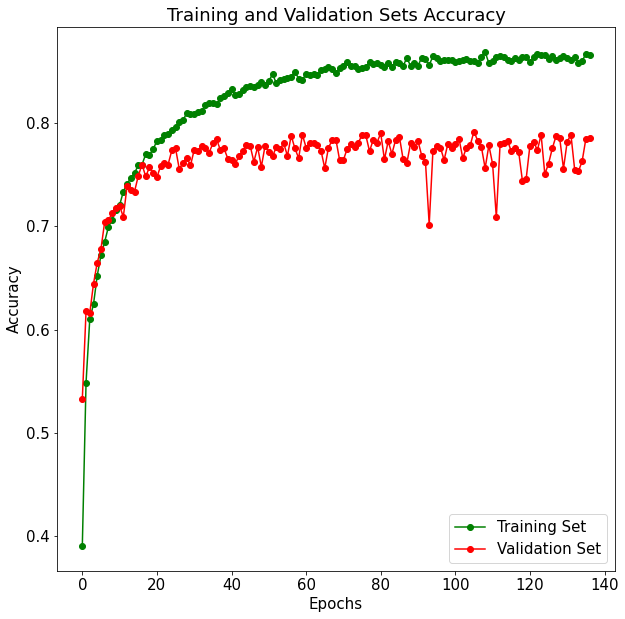

12/12 [==============================] - 7s 564ms/step - loss: 0.6442 - accuracy: 0.7813
Best model Test Loss: 0.6441961526870728
Best model Test Accuracy: 0.781333327293396
Confusion Matrix
Normalized confusion matrix


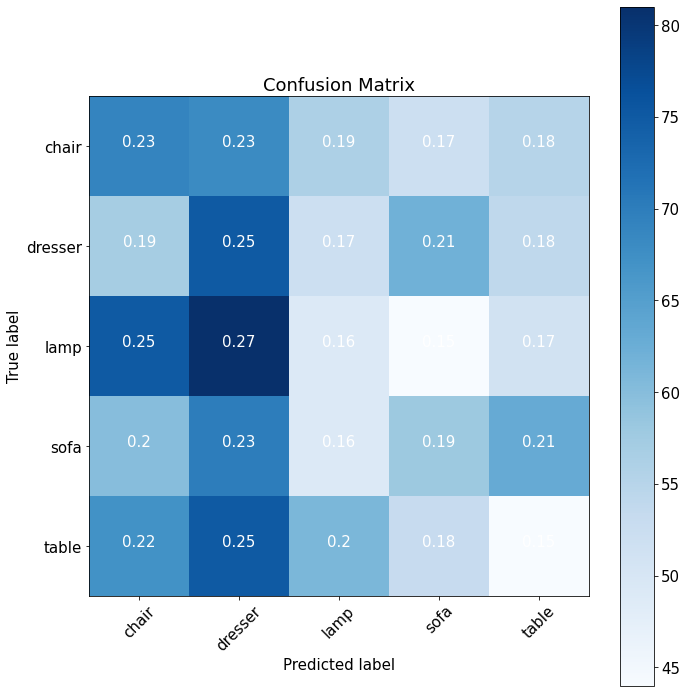

Classification Report
              precision    recall  f1-score   support

       chair       0.21      0.23      0.22       300
     dresser       0.20      0.25      0.22       300
        lamp       0.18      0.16      0.17       300
        sofa       0.22      0.19      0.20       300
       table       0.16      0.15      0.16       300

    accuracy                           0.20      1500
   macro avg       0.20      0.20      0.20      1500
weighted avg       0.20      0.20      0.20      1500


-------- TERMINATED FOLD: 1 --------


In [5]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-6-2", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.0001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 7 - Larger Kernel

#### The chioce was made to use `decay=0.001`.
#### Maybe, early stopping should be set at `min_delta=0.001, patience=50`, i.e. an improvement of 0.1% for 50 epochs of training. I will decide based on the output of this experiment.
#### Stride was not used in order to avoid any possible loss of accuracy.

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-7-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                              

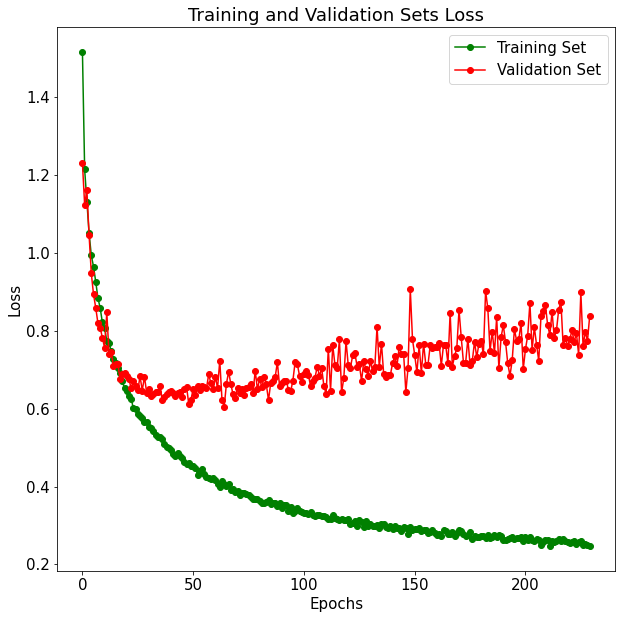

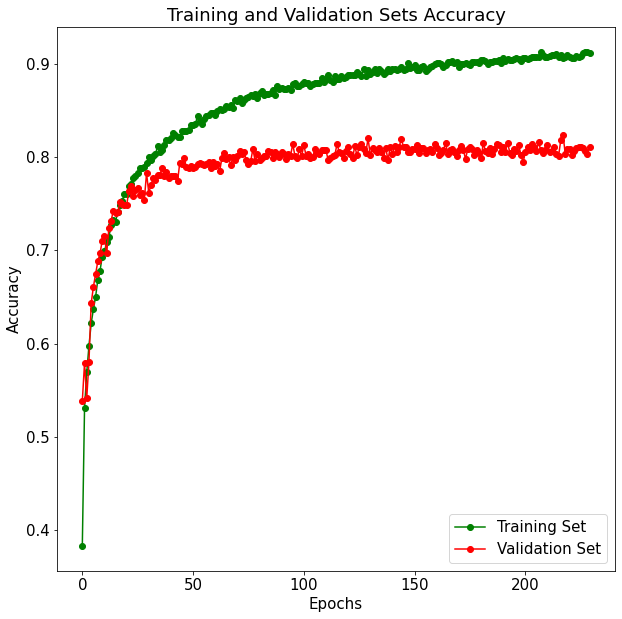

12/12 [==============================] - 7s 558ms/step - loss: 0.6744 - accuracy: 0.7753
Best model Test Loss: 0.6743837594985962
Best model Test Accuracy: 0.7753333449363708
Confusion Matrix
Normalized confusion matrix


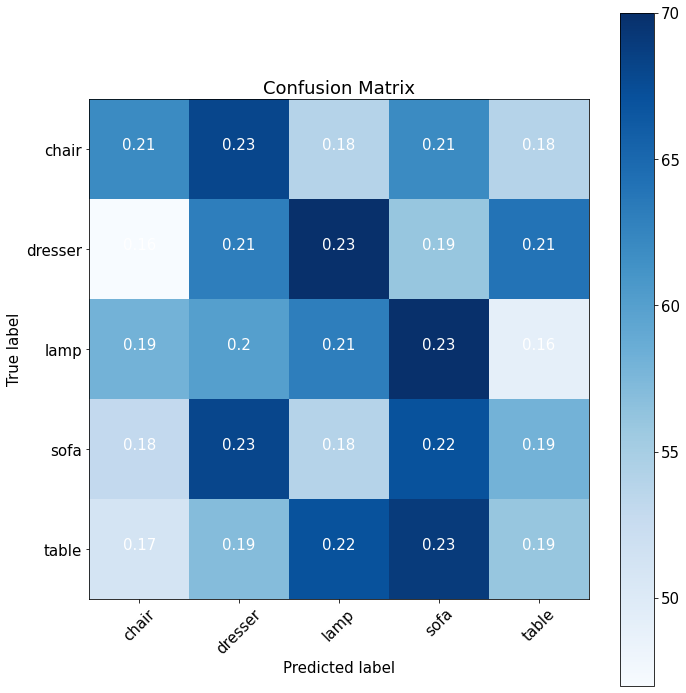

Classification Report
              precision    recall  f1-score   support

       chair       0.23      0.21      0.22       300
     dresser       0.20      0.21      0.20       300
        lamp       0.20      0.21      0.21       300
        sofa       0.21      0.22      0.21       300
       table       0.20      0.19      0.19       300

    accuracy                           0.21      1500
   macro avg       0.21      0.21      0.21      1500
weighted avg       0.21      0.21      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [6]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-7", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 8 (A) - Regularization

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-10 18:54:22.139577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 18:54:22.192217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 18:54:22.192440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 18:54:22.193554: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-8-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)   

2022-02-10 18:54:25.011083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2022-02-10 18:54:25.949677: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


88/88 [==============================] - ETA: 0s - loss: 1.7865 - accuracy: 0.3428
Epoch 00001: val_loss improved from inf to 1.47270, saving model to saved_models/images/Experiment-8/Experiment-8-fold-1.h5
88/88 [==============================] - 62s 679ms/step - loss: 1.7865 - accuracy: 0.3428 - val_loss: 1.4727 - val_accuracy: 0.4818
Epoch 2/400
88/88 [==============================] - ETA: 0s - loss: 1.3760 - accuracy: 0.5004
Epoch 00002: val_loss improved from 1.47270 to 1.37930, saving model to saved_models/images/Experiment-8/Experiment-8-fold-1.h5
88/88 [==============================] - 59s 671ms/step - loss: 1.3760 - accuracy: 0.5004 - val_loss: 1.3793 - val_accuracy: 0.4676
Epoch 3/400
88/88 [==============================] - ETA: 0s - loss: 1.2615 - accuracy: 0.5484
Epoch 00003: val_loss improved from 1.37930 to 1.19467, saving model to saved_models/images/Experiment-8/Experiment-8-fold-1.h5
88/88 [==============================] - 60s 681ms/step - loss: 1.2615 - accuracy: 

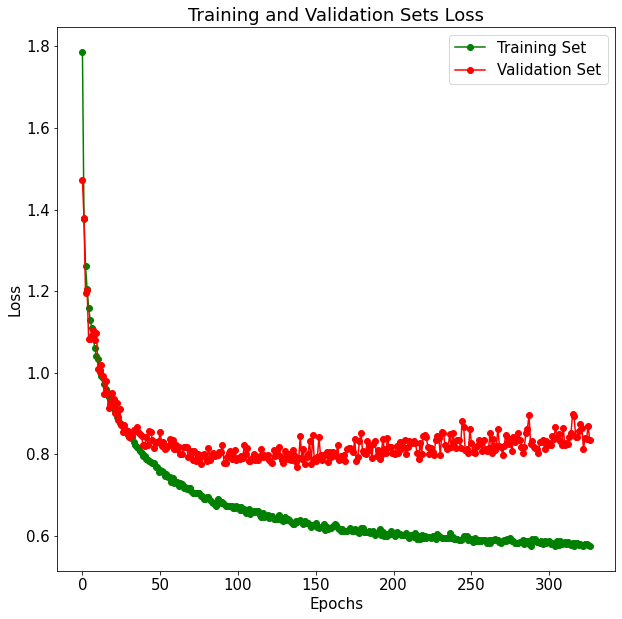

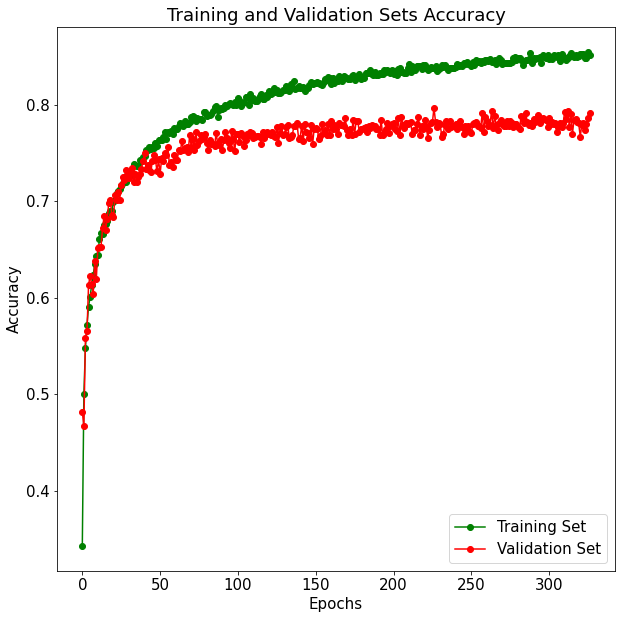

12/12 [==============================] - 7s 557ms/step - loss: 0.7411 - accuracy: 0.7840
Best model Test Loss: 0.7410890460014343
Best model Test Accuracy: 0.7839999794960022
Confusion Matrix
Normalized confusion matrix


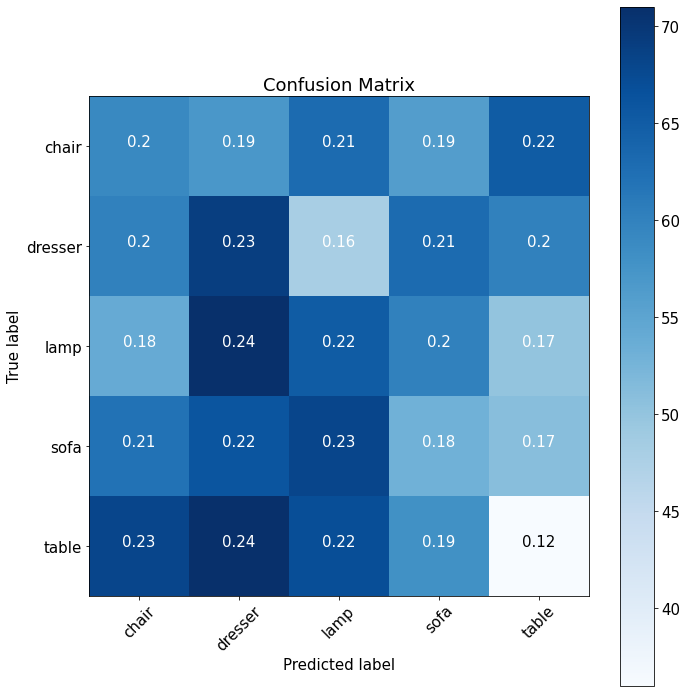

Classification Report
              precision    recall  f1-score   support

       chair       0.19      0.20      0.20       300
     dresser       0.21      0.23      0.22       300
        lamp       0.21      0.22      0.21       300
        sofa       0.18      0.18      0.18       300
       table       0.14      0.12      0.13       300

    accuracy                           0.19      1500
   macro avg       0.19      0.19      0.19      1500
weighted avg       0.19      0.19      0.19      1500


-------- TERMINATED FOLD: 1 --------


In [7]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.001), input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-8", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 8 (B) - Lower Regularization Factor

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-8-2-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                            

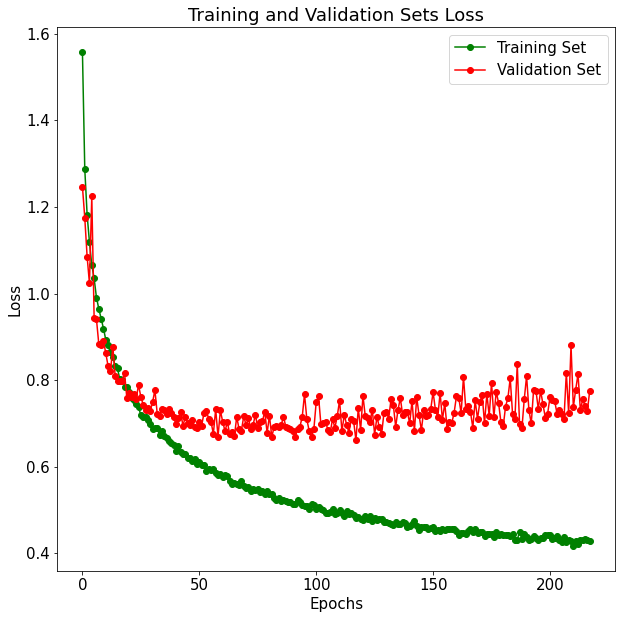

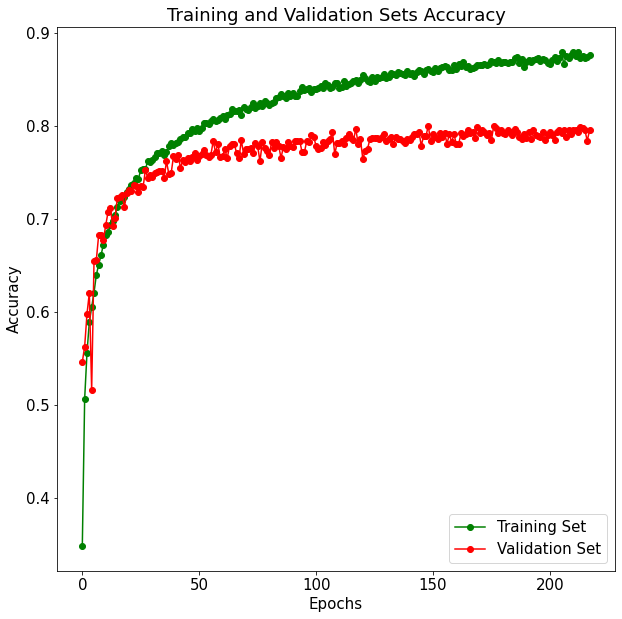

12/12 [==============================] - 7s 554ms/step - loss: 0.7241 - accuracy: 0.7733
Best model Test Loss: 0.7240954041481018
Best model Test Accuracy: 0.7733333110809326
Confusion Matrix
Normalized confusion matrix


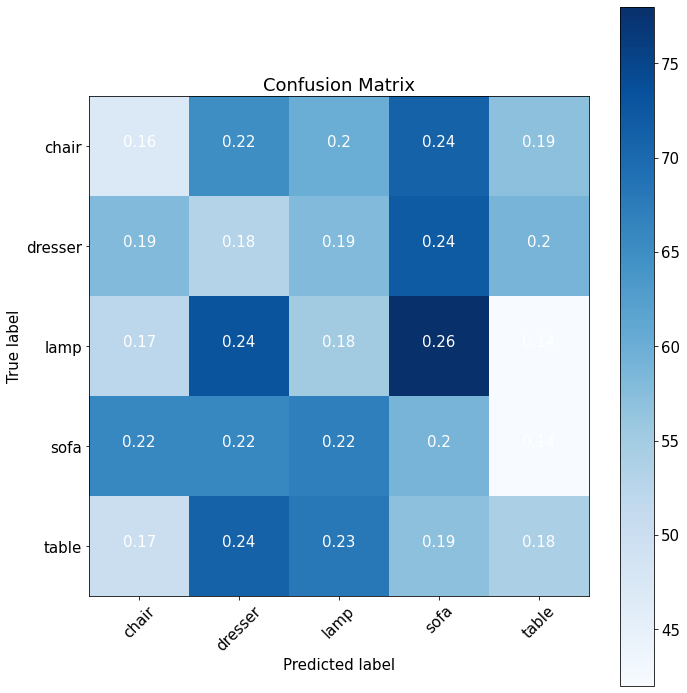

Classification Report
              precision    recall  f1-score   support

       chair       0.17      0.16      0.16       300
     dresser       0.16      0.18      0.17       300
        lamp       0.18      0.18      0.18       300
        sofa       0.18      0.20      0.19       300
       table       0.21      0.18      0.19       300

    accuracy                           0.18      1500
   macro avg       0.18      0.18      0.18      1500
weighted avg       0.18      0.18      0.18      1500


-------- TERMINATED FOLD: 1 --------


In [8]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001), input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-8-2", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

## Experiment 9 - Batch Normalization

#### Early stopping was set to `min_delta=0.001, patience=50`.

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001), input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-9-1", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=True, resample_data=3000, augment=True)

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.
Model: "Experiment-9-1-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        32832     
                            

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001), input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-9-2", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=64, one_fold=True, resample_data=3000, augment=True)

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001), input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.0001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation_layers(model_name="Experiment-9-3", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=32, one_fold=True, resample_data=3000, augment=True)

## Experiment 10 - Final Model

#### Stratified K-Fold Cross Validation was used with `K=6`. The number of samples was increase in order to have a bigger test fold.
#### Early stopping was set to `min_delta=0.001, patience=50`.
#### Confusion matrix is generated for the best model in each fold. At the end, ROC curve is used to compare the best models of different folds.

In [ ]:
# experiment model layers
layers = [
    Conv2D(32, kernel_size=(5, 5), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.0001), input_shape=(128, 128, 3)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(4, 4), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    BatchNormalization(momentum=0.001),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.0001)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-10", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=0.001, target_size=TARGET_SIZE, epochs=400,
                        batch_size=128, one_fold=False, resample_data=6000, augment=True)